In [1]:
#main goal is to look at every part of the image and try to find the total number of apple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import matplotlib.pyplot as plt

**Import and test 1 image**

---

In [2]:
path_image = '.../detection/test/images/'
   
image_name = path_image + 'dataset1_back_1' + '.png'
  
image_abs = Image.open(image_name)

  #conv array
array_image = img_to_array(image_abs)

**Slice the image**

In [3]:
#create multiples images 
val_images = np.full((3600,16,16,3), 0)

In [4]:
#cut image in multiple small ones
k=0
im = image_abs
for i in range(0,1264,16):
    for j in range(0,704,16):
        box = (j, i, j+16, i+16)
        a = im.crop(box)
        #o = a.crop(area)
        val_images[k,:,:,:] = a
        k = k + 1

In [5]:
#resize to 0-1
val_images = val_images / 255.0
print(val_images.shape)

(3600, 16, 16, 3)


number of apple
[[192.1575]]


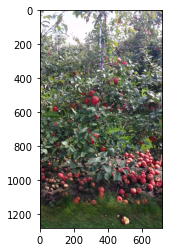

In [46]:
from keras.models import load_model
import keras

detectness = 0.5

#load CNN
model = load_model('Binary_sig_R1_v4.h5')
opt = keras.optimizers.Adam(learning_rate=0.0001) # choose an optimizer - no need to understand
model.compile(loss=["binary_crossentropy", "mse"], loss_weights=[0.8, 0.2], optimizer=opt, metrics=["accuracy"])

#resize to correct format for CNN
tab_cut_images = np.resize(val_images,(3600,32,32,3))

#main apple counting with CNN iteration
number_apple = 0
for i in range(0,3599):
    #select image i
    image_i = tab_cut_images[i,:,:,:]
    image_i = np.expand_dims(image_i, axis=0)
    #predict apple and add to total count using detectness adjustn
    prediction_nb = model.predict(image_i)
    number_apple = number_apple + prediction_nb*detectness
    
#show results
plt.imshow(image_abs)
print("number of apple")
print(int(number_apple))